# Domain uniqueness analysis

## Load data from Gaffer

In [1]:
import requests
import json
import sys
import gaffer
import threatgraph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
g = threatgraph.Gaffer()
g.use_cert()

In [3]:
op = gaffer.OperationChain([
    gaffer.GetAllElements(entities=[
        gaffer.ViewGroup("device", exclude=["count", "time"])
    ], edges=None),
    gaffer.GetWalks(
        operations=[
            gaffer.OperationChain(operations=[
                gaffer.GetElements(edges=[
                    gaffer.ViewGroup("hasip", exclude=["count", "time"])
                ], entities=None, include="OUTGOING")
            ]), 
            gaffer.OperationChain(operations=[
                gaffer.GetElements(edges=[
                    gaffer.ViewGroup("dnsquery")
                ], entities=None, include="OUTGOING")
            ]), 
             gaffer.OperationChain(operations=[
                gaffer.GetElements(edges=[
                    gaffer.ViewGroup("indomain", exclude=["count", "time"])
                ], entities=None, include="OUTGOING")
            ])
        ],
        limit=10000000)
])

query = op.encode()
res = g.execute_chunked(op)

things = {}
timestamps = {}
counts = {}

all_things = set()
all_devices = set()

for v in res:

    try:
        ent = json.loads(v)

    except Exception:
        continue

    dev = list(ent["entities"][0].keys())[0]
    thing = list(ent["entities"][3].keys())[0]
    
    k = (dev, thing)

    if not k in counts:
        counts[k] = 0
        timestamps[k] = set()
        
    if not dev in things:
        things[dev] = set()

    ts = ent["edges"][1][0]["properties"]["time"]["uk.gov.gchq.gaffer.time.RBMBackedTimestampSet"]["timestamps"]
    cnt = ent["edges"][1][0]["properties"]["count"]

    counts[k] += cnt
    timestamps[k].update(ts)
    things[dev].add(thing)
    all_things.add(thing)
    all_devices.add(dev)

In [4]:
all_devices = list(all_devices)
all_things = list(all_things)

## Construct heatmap matrix

In [5]:
def get_counts(thing, dev):
    if thing in things[dev]: return counts[(dev, thing)]
    return 0

datas = [ [ get_counts(thing, dev) for dev in all_devices ] for thing in all_things]
df = pd.DataFrame(datas, index=all_things, columns=all_devices)
df

,steamverne-mac,abroad-android,boundless-mac,serotinal-mac,tirasse-mac,minesweepers-mac,DESKTOP-PIMD8C0,essential-mac,MalcomWare-PC,languid-mac,...,essential-chrome,turing-chromebook,nervings-cb,mark-mac,misskitty-mac,dgmac,terrestrial-mac,simon-macpro,castle3b7c9f,turing-macbook
zonefox.com,0,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
opentable.com,0,0,0,11,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
ng-book.com,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jplxnglus.home,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
nanovisor.io,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
deckchair.co.uk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
socketloop.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
ipify.org,0,0,0,5,0,0,0,0,0,7,...,0,0,0,0,2,0,2,0,0,0
sk-static.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jsmhmpcuoqzcwk.openvpn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df["score"] = df.sum(axis=1)

In [7]:
df

,steamverne-mac,abroad-android,boundless-mac,serotinal-mac,tirasse-mac,minesweepers-mac,DESKTOP-PIMD8C0,essential-mac,MalcomWare-PC,languid-mac,...,turing-chromebook,nervings-cb,mark-mac,misskitty-mac,dgmac,terrestrial-mac,simon-macpro,castle3b7c9f,turing-macbook,score
zonefox.com,0,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
opentable.com,0,0,0,11,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,16
ng-book.com,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
jplxnglus.home,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
nanovisor.io,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,6
deckchair.co.uk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,3
socketloop.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,3
ipify.org,0,0,0,5,0,0,0,0,0,7,...,0,0,0,2,0,2,0,0,0,18
sk-static.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
jsmhmpcuoqzcwk.openvpn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [8]:
my_fn = lambda x: np.log(x + 0.001)

In [9]:
df2 = df.copy()
df2[all_devices] = df2[all_devices].apply(my_fn)
df2 = df2.sort_values(by="score", ascending=False)

In [10]:
df2[:25]

,steamverne-mac,abroad-android,boundless-mac,serotinal-mac,tirasse-mac,minesweepers-mac,DESKTOP-PIMD8C0,essential-mac,MalcomWare-PC,languid-mac,...,turing-chromebook,nervings-cb,mark-mac,misskitty-mac,dgmac,terrestrial-mac,simon-macpro,castle3b7c9f,turing-macbook,score
google.com,10.249627,4.564359,9.829733,8.905309,8.240913,8.962392,5.361297,1.386544,4.912662,8.731337,...,7.724005,8.802222,7.615299,10.402959,5.796061,9.751676,9.371098,-6.907755,6.492241,201804
gstatic.com,8.380457,2.995782,8.241703,7.133297,6.648986,7.327781,4.820290,0.001000,4.060460,7.067321,...,6.212608,7.075810,6.214610,8.662332,4.110890,8.071843,7.727095,-6.907755,4.369461,37714
trustnetworks.com,4.418853,0.001000,6.192365,3.610945,4.077554,5.003953,7.258413,-6.907755,7.550136,1.946053,...,2.197336,6.173788,6.278523,6.028281,4.127151,6.008816,1.386544,-6.907755,0.001000,37015
googleapis.com,8.188412,3.850169,7.404888,7.385852,5.942802,7.316549,4.804029,-6.907755,4.553887,6.434548,...,6.470801,7.337588,5.762055,8.680672,3.931845,7.567346,7.050990,-6.907755,4.465920,33499
apple.com,7.016611,-6.907755,8.329417,6.791223,5.948038,7.458763,-6.907755,2.639129,-6.907755,7.290294,...,4.369461,-6.907755,6.054442,8.535230,4.262694,7.906179,7.243514,-6.907755,5.455325,28382
in-addr.arpa,7.489413,-6.907755,8.454467,7.156957,6.899724,7.674153,4.584978,1.098946,-6.907755,7.295736,...,3.951263,-6.907755,5.872121,8.098339,3.912043,7.557995,6.587551,-6.907755,5.398167,26033
clubhouse.io,8.056110,-6.907755,8.264621,-6.907755,6.416734,7.458763,-6.907755,-6.907755,-6.907755,-6.907755,...,-6.907755,8.042057,6.008816,7.489413,4.262694,7.150702,-6.907755,-6.907755,-6.907755,21685
akadns.net,6.001417,-6.907755,7.395722,4.077554,5.707114,6.966025,-6.907755,-6.907755,-6.907755,6.204560,...,3.434019,-6.907755,2.833272,9.095042,3.178095,5.659486,7.353723,-6.907755,4.836290,17423
doubleclick.net,8.517793,2.890427,7.400010,6.570884,5.105952,6.675824,4.820290,-6.907755,2.995782,6.590302,...,3.989003,6.156981,5.484801,8.307953,1.386544,7.000335,3.761223,-6.907755,1.098946,17195
slack.com,7.113143,2.302685,7.478735,6.489206,5.433726,6.959399,-6.907755,-6.907755,-6.907755,5.991467,...,5.267863,6.771937,5.198503,7.711102,3.496538,7.277248,6.587551,-6.907755,3.637612,14575


## Plot heatmap - popular domains

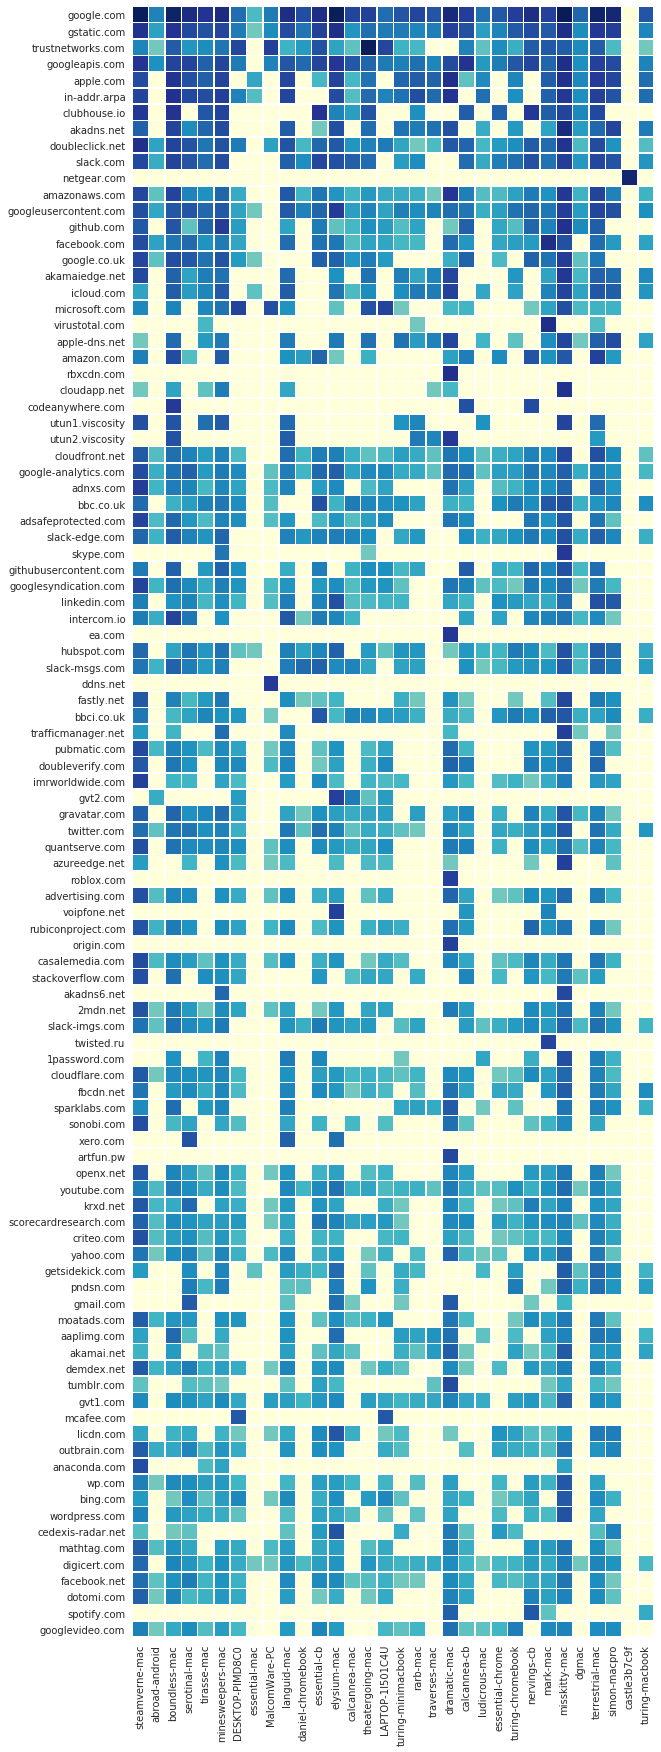

In [11]:
sns.set(style="white")
plt.figure(figsize=(20, 30))
sns.heatmap(df2[0:100][all_devices], square=True, linewidths=0.5, cbar=False, cmap="YlGnBu")
plt.show()

## Plot heatmap - least popular domains

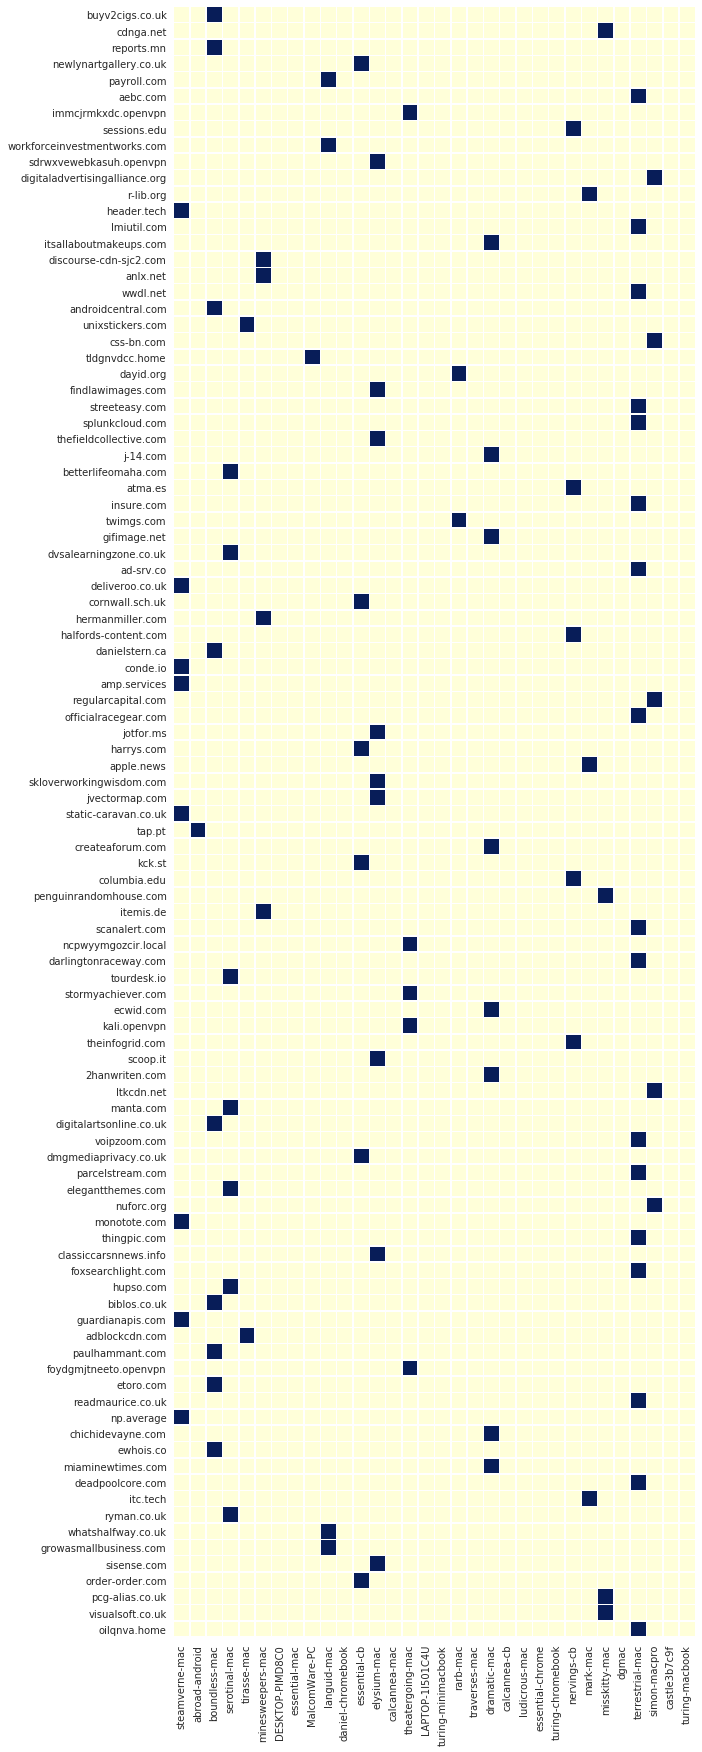

In [12]:
sns.set(style="white")
plt.figure(figsize=(20, 30))
sns.heatmap(df2.sort_values(by="score", ascending=True)[0:100][all_devices], square=True, linewidths=0.5, cbar=False, cmap="YlGnBu")
plt.show()

## Domains only used on one device

In [13]:
df3 = df.copy()
df3 = df3.apply(lambda x: [1 if v > 0 else 0 for v in x])
df3["count"] = df3[all_devices].apply(np.count_nonzero, axis=1)
df3

,steamverne-mac,abroad-android,boundless-mac,serotinal-mac,tirasse-mac,minesweepers-mac,DESKTOP-PIMD8C0,essential-mac,MalcomWare-PC,languid-mac,...,nervings-cb,mark-mac,misskitty-mac,dgmac,terrestrial-mac,simon-macpro,castle3b7c9f,turing-macbook,score,count
zonefox.com,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
opentable.com,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,3
ng-book.com,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
jplxnglus.home,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
nanovisor.io,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
deckchair.co.uk,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
socketloop.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
ipify.org,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,6
sk-static.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
jsmhmpcuoqzcwk.openvpn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


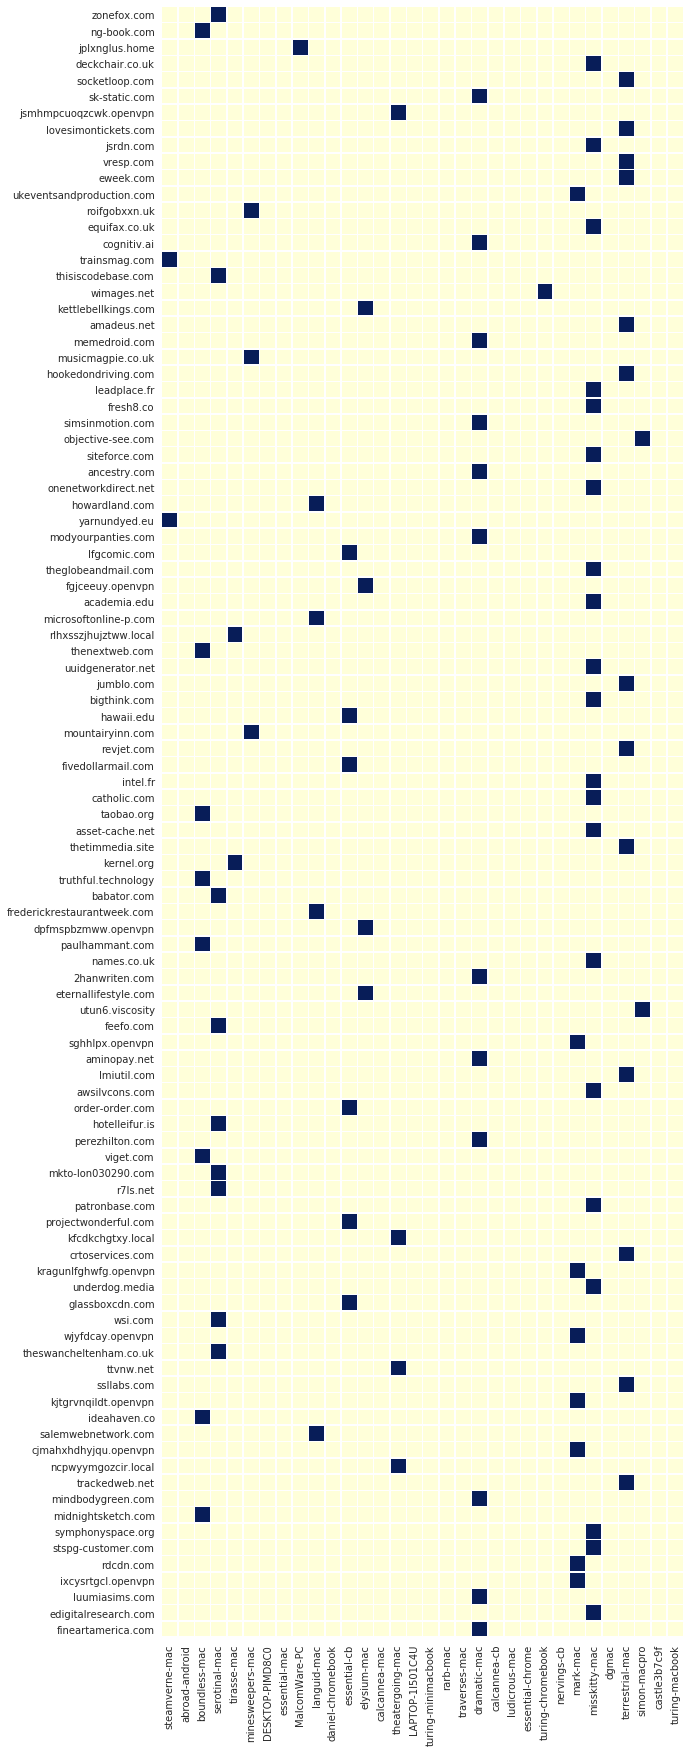

In [14]:
plt.figure(figsize=(20, 30))
sns.heatmap(df3[df3["count"] < 2][0:100][all_devices], square=True, linewidths=0.5, cbar=False, cmap="YlGnBu")
plt.show()

## Which devices have the highest number of unique domains?

In [15]:
df3[df3["count"] < 2][all_devices].sum().to_frame("count").sort_values("count", ascending=False)

,count
misskitty-mac,695
dramatic-mac,486
terrestrial-mac,484
elysium-mac,344
serotinal-mac,329
essential-cb,284
steamverne-mac,248
boundless-mac,244
languid-mac,187
mark-mac,183


## Which devices have the lowest number of unique domains?

In [16]:
df3[df3["count"] < 2][all_devices].sum().to_frame("count").sort_values("count", ascending=True)

,count
LAPTOP-1I501C4U,0
ludicrous-mac,0
DESKTOP-PIMD8C0,0
essential-mac,0
castle3b7c9f,1
dgmac,2
daniel-chromebook,2
traverses-mac,9
calcannea-mac,10
turing-macbook,11
